In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Load in the data set
fifaDB = pd.read_csv("data.csv")

In [3]:
#Preview Data base
fifaDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
fifaDB.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#Drop unnecessary columns
Fifa = fifaDB.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Joined', 'Loaned From', 'Contract Valid Until', 'Special', 'International Reputation', 'Real Face', "Nationality", "Age", "ID", "Release Clause", "Club","GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes" ], axis=1)

In [6]:
#Look for null values
Fifa.isna().sum() 

Name                0
Overall             0
Potential           0
Value               0
Wage                0
Preferred Foot     48
Weak Foot          48
Skill Moves        48
Work Rate          48
Body Type          48
Position           60
Jersey Number      60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [7]:
#Drop null values
Fifa = Fifa.dropna()

In [8]:
#Set index
Fifa.set_index('Name', inplace=True)

In [9]:
list_wages = Fifa['Wage']
wages = []
for i in list_wages:
    hoi = i.strip('K').strip('€')
    wage = int(hoi) * 1000
    wages.append(wage)
    
Fifa['Wage'] = wages



In [10]:
list_lengths = np.array(Fifa['Height'])
empty_list = []
for x in list_lengths:
    splitted_values = str(x).split("'")
    feet = (float(x[0])) + (float(x[2])/10)
    centimeters = feet * 30.48
    empty_list.append(round(centimeters))

Fifa['Height'] = empty_list


In [11]:
list_value = Fifa['Value']
list_new_values = []
rows = list_value[:]

for v in rows:
    if v[-1] == 'M':
        strip_value = v.strip('M€')
        if len(strip_value) >= 4:
            yes = (strip_value[:3])
            new_value = float(yes) * 1000000
            list_new_values.append(int(new_value))
        else:
            new_value = float(strip_value) * 1000000
            list_new_values.append(int(new_value))
            
    else:
        strip_value = v.strip('K€')
        new_value = float(strip_value) * 1000
        
        list_new_values.append(int(new_value))

        
Fifa['Value'] = list_new_values

In [12]:
list_weight = Fifa['Weight']
weights = []
for i in list_weight:
    lbs_to_kg = i.strip('lbs')
    convert_weight = float(lbs_to_kg)/2.2046
    roundup_weight = round(convert_weight)
    weights.append(roundup_weight)

Fifa['Weight'] = weights

In [13]:
#Label encoder for Work Rate and Position
le = preprocessing.LabelEncoder()
Fifa['Work Rate'] = Fifa[['Work Rate']].apply(le.fit_transform)
Fifa['Body Type'] = Fifa[['Body Type']].apply(le.fit_transform)
Fifa['Position'] = Fifa[['Position']].apply(le.fit_transform)

In [14]:
#onehot encoding
Fifa["Preferred Foot"] = pd.get_dummies(Fifa["Preferred Foot"])

In [15]:
#Remove Goalkeepers
Fifa = Fifa[Fifa.Position != 5]
Fifa.head(10)

,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,94,94,110000000,565000,1,4.0,4.0,8,4,21,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
Cristiano Ronaldo,94,94,77000000,405000,0,4.0,5.0,1,1,26,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
Neymar Jr,92,93,118000000,290000,0,5.0,5.0,2,5,14,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
K. De Bruyne,91,92,102000000,355000,0,5.0,4.0,0,6,19,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
E. Hazard,91,91,93000000,340000,0,4.0,4.0,2,6,11,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
L. Modrić,91,91,67000000,420000,0,4.0,4.0,0,3,19,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
L. Suárez,91,91,80000000,455000,0,4.0,3.0,2,6,23,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
Sergio Ramos,91,91,51000000,380000,0,3.0,3.0,2,6,18,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
R. Lewandowski,90,90,77000000,205000,0,4.0,4.0,2,6,26,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0


In [16]:
FifaSkills = Fifa[['Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]

In [17]:
FifaNormSkill = FifaSkills.div(Fifa.Overall, axis=0)
Fifa['Finishing'] = FifaNormSkill['Finishing']
Fifa['HeadingAccuracy'] = FifaNormSkill['HeadingAccuracy']
Fifa['ShortPassing'] = FifaNormSkill['ShortPassing']
Fifa['Volleys'] = FifaNormSkill['Volleys']
Fifa['Dribbling'] = FifaNormSkill['Dribbling']
Fifa['Curve'] = FifaNormSkill['Curve']
Fifa['FKAccuracy'] = FifaNormSkill['FKAccuracy']
Fifa['LongPassing'] = FifaNormSkill['LongPassing']
Fifa['BallControl'] = FifaNormSkill['BallControl']
Fifa['Acceleration'] = FifaNormSkill['Acceleration']
Fifa['SprintSpeed'] = FifaNormSkill['SprintSpeed']
Fifa['Agility'] = FifaNormSkill['Agility']
Fifa['Reactions'] = FifaNormSkill['Reactions']
Fifa['Balance'] = FifaNormSkill['Balance']
Fifa['ShotPower'] = FifaNormSkill['ShotPower']
Fifa['Jumping'] = FifaNormSkill['Jumping']
Fifa['Stamina'] = FifaNormSkill['Stamina']
Fifa['Strength'] = FifaNormSkill['Strength']
Fifa['LongShots'] = FifaNormSkill['LongShots']
Fifa['Aggression'] = FifaNormSkill['Aggression']
Fifa['Interceptions'] = FifaNormSkill['Interceptions']
Fifa['Positioning'] = FifaNormSkill['Positioning']
Fifa['Vision'] = FifaNormSkill['Vision']
Fifa['Composure'] = FifaNormSkill['Composure']
Fifa['Marking'] = FifaNormSkill['Marking']
Fifa['StandingTackle'] = FifaNormSkill['StandingTackle']
Fifa['SlidingTackle'] = FifaNormSkill['SlidingTackle']

In [18]:
#Features and labels seperation
Features = Fifa.drop(["Position"],axis=1)
Labels = Fifa["Position"]

In [19]:
X = Features
y = Labels

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [21]:
#Choose model with hyperparameters
model = RandomForestClassifier(n_estimators=500, max_features=10,max_depth=10)

In [22]:
#fit model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
val_pred = model.predict(X_val)

In [24]:
#Accuracy
print('Accuracy:', metrics.accuracy_score(y_val, val_pred))

Accuracy: 0.5472868217054263


In [25]:
#check feauture importance
feature_imp = pd.Series(model.feature_importances_,index=Features.columns).sort_values(ascending=False)
feature_imp

Preferred Foot     0.068332
StandingTackle     0.060550
Finishing          0.059225
SlidingTackle      0.058042
Dribbling          0.056529
ShortPassing       0.055333
LongPassing        0.054642
Crossing           0.049101
HeadingAccuracy    0.044845
Vision             0.044151
Interceptions      0.042852
Positioning        0.042388
BallControl        0.032710
Marking            0.030139
Acceleration       0.023810
SprintSpeed        0.021558
Strength           0.015891
LongShots          0.015724
Stamina            0.014686
Overall            0.014660
Agility            0.014144
ShotPower          0.013030
Balance            0.012718
Curve              0.012550
Volleys            0.012336
Value              0.012309
Jersey Number      0.011997
FKAccuracy         0.011910
Reactions          0.011861
Aggression         0.011651
Jumping            0.011468
Composure          0.010938
Penalties          0.009314
Weight             0.008861
Potential          0.007311
Height             0

No handles with labels found to put in legend.


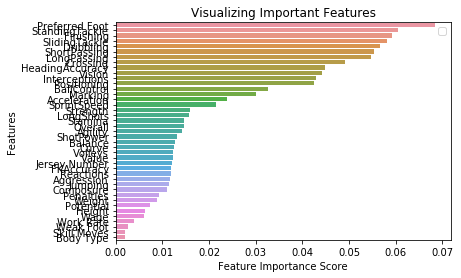

In [26]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [38]:
#Selecting new features based on importance
#Threshold is Feature>0.02
Features2 = Fifa.drop(["Penalties","Weight","Potential","Height","Wage","Work Rate","Weak Foot","Skill Moves","Body Type"], axis=1)
Labels2 = Fifa["Position"]

In [39]:
X = Features2
y = Labels2

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [41]:
#Selecting best hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(X_train, y_train)

best_estimator = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.5min finished


In [42]:
# Actual class predictions
val_pred = best_estimator.predict(X_val)

In [43]:
#Accuracy
print('Accuracy:', metrics.accuracy_score(y_val, val_pred))

Accuracy: 0.9263565891472868
